## 1. Load libraries

In [1]:
from ucimlrepo import fetch_ucirepo  # Library to directly download datasets from UC Irvine Machine Learning Repo
import pandas as pd # Library to handle and manipulate data
pd.options.mode.chained_assignment = None  # default='warn'
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math

## 2. Load datasets

In [2]:
# Covid 19 dataset
covid_19_surveillance = fetch_ucirepo(id=567) 
covid_19_X = covid_19_surveillance.data.features 
covid_19_y = covid_19_surveillance.data.targets 
# Hepatisis dataset
hepatitis = fetch_ucirepo(id=46)   
hepatitis_X = hepatitis.data.features 
hepatitis_y = hepatitis.data.targets 
# Chronic kidney disease dataset
chronic_kidney_disease = fetch_ucirepo(id=336) 
chronic_kidney_disease_X = chronic_kidney_disease.data.features 
chronic_kidney_disease_y = chronic_kidney_disease.data.targets 
# Breast cancer dataset
breast_cancer_wisconsin_diagnostic = fetch_ucirepo(id=17) 
breast_cancer_X = breast_cancer_wisconsin_diagnostic.data.features 
breast_cancer_y = breast_cancer_wisconsin_diagnostic.data.targets 
# Cryotherapy dataset   
Cryotherapy = pd.read_excel("Cryotherapy.xlsx")
cryotherapy_X = Cryotherapy.drop(columns=['Result_of_Treatment'])
cryotherapy_y = Cryotherapy.Result_of_Treatment
# Immunotherapy dataset
Immunotherapy = pd.read_excel("Immunotherapy.xlsx")
immunotherapy_X = Immunotherapy.drop(columns=['Result_of_Treatment'])
immunotherapy_y = Immunotherapy.Result_of_Treatment

## 3. Data Cleaning and EDA

In [41]:
# Define a function to check if a row is complete (contains no missing values)
def is_complete(row):
    return row.notnull().all()

def preprocess_data(X, Y):
    """
    Preprocesses the input data:
    1. Imputes missing values with the mean of each column.
    2. Imputes missing values with the median of each column.
    3. Drops rows with missing values from both the explanatory (X) and target (Y) variables.

    Parameters:
    - X (DataFrame): Explanatory variables DataFrame.
    - Y (DataFrame): Target variable DataFrame.

    Returns:
    - X_mean_imputted (DataFrame): X DataFrame with missing values imputed using column means.
    - X_median_imputted (DataFrame): X DataFrame with missing values imputed using column medians.
    - X_missing_dropped (DataFrame): X DataFrame with missing rows dropped.
    - Y_missing_dropped (DataFrame): Y DataFrame corresponding to the rows dropped in X.
    """
    
    # Calculate the mean and median of each column in X
    column_means = X.mean()
    column_medians = X.median()
    
    # Create copies of X for mean and median imputation
    X_mean_imputted = X.fillna(column_means)
    X_median_imputted = X.fillna(column_medians)
    
    # Create copies of X and Y for dropping missing data
    X_missing_dropped = X.dropna()
    Y_missing_dropped = Y.loc[X_missing_dropped.index]
    
    return X_mean_imputted, X_median_imputted, X_missing_dropped, Y_missing_dropped


def plot_target_variable_distribution(target_variable):
    """
    Plots the distribution of the target variable.

    Parameters:
    - target_variable (Series): Target variable Series.

    Returns:
    - None
    """
    # Plot the target variable distribution
    plt.figure(figsize=(4, 3))
    target_variable.value_counts().plot(kind='bar', color='skyblue')
    plt.title('Distribution of Target Variable')
    plt.xlabel('Target')
    plt.ylabel('Count')
    plt.xticks(rotation=0)
    plt.tight_layout()
    plt.show()


def plot_variable_distribution(dataframe):
    """
    Plots the distribution of each variable in the input DataFrame.

    Parameters:
    - dataframe (DataFrame): Input DataFrame.

    Returns:
    - None
    """
    # Define the number of rows based on the number of columns and keeping ncols=5
    ncols = 5
    nrows = math.ceil(len(dataframe.columns) / ncols)
    
    # Get the binary columns starting with "is_"
    binary_columns = [col for col in dataframe.columns if col.startswith('is_')]
    
    # Set up the figure and axes
    fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 4 * nrows))
    
    # Flatten the axs array to iterate over it easily
    axs = axs.flatten()
    
    # Iterate over each column and plot its distribution
    for i, col in enumerate(dataframe.columns):
        if col in binary_columns:
            # Count the frequency of each category
            counts = dataframe[col].value_counts().sort_index()
            # Plot the bars next to each other
            counts.plot(kind='bar', ax=axs[i], color=['skyblue', 'lightcoral'])
            axs[i].set_title(f'Distribution of {col}')
            axs[i].set_ylabel('Frequency')
            # Force the x ticks to be integers
            axs[i].set_xticks(range(len(counts)))
            axs[i].set_xticklabels(counts.index.astype(int), rotation=0)  # Set x tick labels as integers
        else:
            # Plot the histogram for non-binary columns
            axs[i].hist(dataframe[col], bins=20, color='skyblue', edgecolor='black')
            axs[i].set_title(f'Distribution of {col}')
            axs[i].set_xlabel(col)
            axs[i].set_ylabel('Frequency')
    
    # Hide any empty subplots
    for ax in axs[len(dataframe.columns):]:
        ax.axis('off')
    
    # Adjust layout and show the plot
    plt.tight_layout()
    plt.show()

def plot_correlation_matrix(X, y=None):
    """
    Plots the correlation matrix for explanatory variables and the target variable (if provided).

    Parameters:
    - X (DataFrame): Explanatory variables DataFrame.
    - y (Series, optional): Target variable Series. Default is None.

    Returns:
    - None
    """
    # Concatenate X and y if y is provided
    if y is not None:
        data = pd.concat([X, y], axis=1)
    else:
        data = X
    
    # Calculate correlation matrix
    corr_matrix = data.corr()
    
    # Create a mask to hide the upper triangle
    corr_matrix_mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
    
    # Plot correlation matrix showing only the lower triangle
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr_matrix, mask=corr_matrix_mask, annot=True, cmap='coolwarm', fmt=".1f", linewidths=.5)
    
    # Set plot title
    if y is not None:
        plt.title('Correlation Matrix for Explanatory and Target Variables')
    else:
        plt.title('Correlation Matrix for Explanatory Variables')

    plt.show()

### 3.1. Covid 19 Dataset

In [3]:
# Replace '+' with 1 and '-' with 0 in each column
covid_19_X = covid_19_X.replace({'+': 1, '-': 0})
# Convert columns to numeric
covid_19_X = covid_19_X.apply(pd.to_numeric)
# Summary statistics
covid_19_X.describe()

,A01,A02,A03,A04,A05,A06,A07
count,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000
mean,0.714286,0.714286,0.285714,0.642857,0.285714,0.285714,0.357143
std,0.468807,0.468807,0.468807,0.497245,0.468807,0.468807,0.497245
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.250000,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,0.750000,1.000000,0.750000,0.750000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


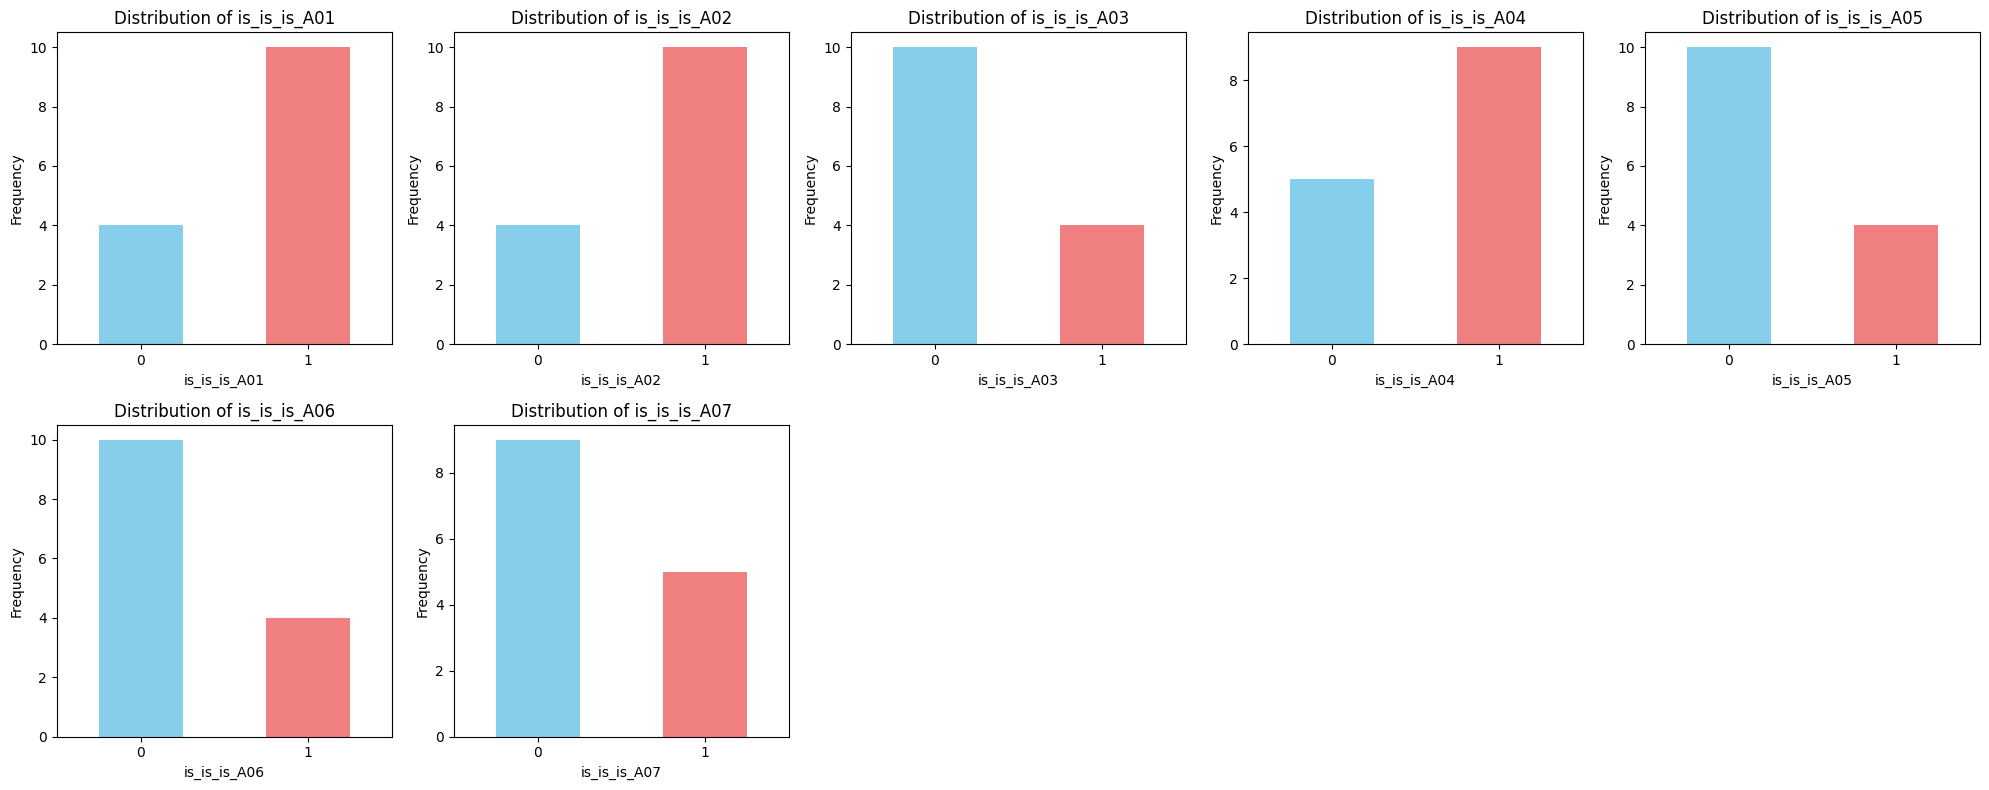

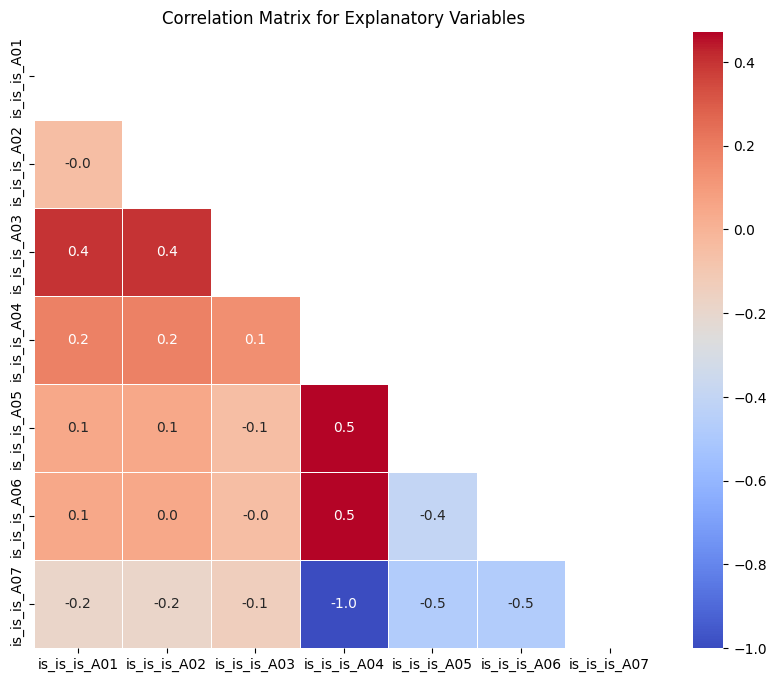

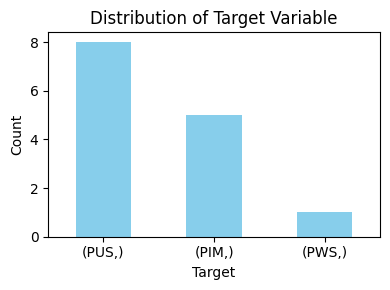

In [45]:
covid_19_X.columns =  ['is_' + col for col in covid_19_X.columns]
plot_variable_distribution(covid_19_X)
plot_correlation_matrix(covid_19_X)
# Plot the target variable distribution
plot_target_variable_distribution(covid_19_y)

### 3.2. Hepatitis Dataset

In [6]:
hepatitis_X.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,155.0,41.200000,12.565878,7.0,32.00,39.0,50.00,78.0
Sex,155.0,1.103226,0.305240,1.0,1.00,1.0,1.00,2.0
Steroid,154.0,1.506494,0.501589,1.0,1.00,2.0,2.00,2.0
Antivirals,155.0,1.845161,0.362923,1.0,2.00,2.0,2.00,2.0
Fatigue,154.0,1.350649,0.478730,1.0,1.00,1.0,2.00,2.0
Malaise,154.0,1.603896,0.490682,1.0,1.00,2.0,2.00,2.0
Anorexia,154.0,1.792208,0.407051,1.0,2.00,2.0,2.00,2.0
Liver Big,145.0,1.827586,0.379049,1.0,2.00,2.0,2.00,2.0
Liver Firm,144.0,1.583333,0.494727,1.0,1.00,2.0,2.00,2.0
Spleen Palpable,150.0,1.800000,0.401340,1.0,2.00,2.0,2.00,2.0


In [7]:
# List of columns to apply binary remapping
columns_to_process = ['Steroid', 'Sex', 'Antivirals', 'Fatigue', 'Malaise', 'Anorexia', 'Liver Big', 
                      'Liver Firm', 'Spleen Palpable', 'Spiders', 'Ascites', 'Varices', 'Histology']
for col in columns_to_process:
    if col == 'Sex':
        hepatitis_X['is_female'] = hepatitis_X[col] - 1
    else:
        # Apply the binary remapping: convert to binary and rename the column
        hepatitis_X[f'is_{col.lower()}'] = hepatitis_X[col] - 1
    # Drop the original column
    hepatitis_X.drop(columns=[col], inplace=True)

# Also apply binary remapping to target column
hepatitis_y['is_alive'] = hepatitis_y['Class'] - 1
hepatitis_y.drop(columns=['Class'], inplace=True)

# Check dataset
hepatitis_X.head()

,Age,Bilirubin,Alk Phosphate,Sgot,Albumin,Protime,is_steroid,is_female,is_antivirals,is_fatigue,is_malaise,is_anorexia,is_liver big,is_liver firm,is_spleen palpable,is_spiders,is_ascites,is_varices,is_histology
0,30,1.0,85.0,18.0,4.0,NaN,0.0,1,1,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0
1,50,0.9,135.0,42.0,3.5,NaN,0.0,0,1,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0
2,78,0.7,96.0,32.0,4.0,NaN,1.0,0,1,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0
3,31,0.7,46.0,52.0,4.0,80.0,NaN,0,0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0
4,34,1.0,NaN,200.0,4.0,NaN,1.0,0,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0


In [ ]:
# Plot the distribution of each explanatory variable (X)
plot_variable_distribution(hepatitis_X)

# Plot the correlation matrix for explanatory variables (X) and the target variable (y)
plot_correlation_matrix(hepatitis_X, hepatitis_y)

# Plot the distribution of the target variable (y)
plot_target_variable_distribution(hepatitis_y)

# Preprocess the data: mean imputation, median imputation, and dropping missing rows
hepatitis_X_mean_imputted, hepatitis_X_median_imputted, hepatitis_X_missing_dropped, hepatitis_y_missing_dropped = preprocess_data(hepatitis_X, hepatitis_y)

### 3.3. Chronic Kidney Disease Dataset

In [12]:
chronic_kidney_disease_X.describe().T

,count,mean,std,min,25%,50%,75%,max
age,391.0,51.483376,17.169714,2.000,42.00,55.00,64.50,90.000
bp,388.0,76.469072,13.683637,50.000,70.00,80.00,80.00,180.000
sg,353.0,1.017408,0.005717,1.005,1.01,1.02,1.02,1.025
al,354.0,1.016949,1.352679,0.000,0.00,0.00,2.00,5.000
su,351.0,0.450142,1.099191,0.000,0.00,0.00,0.00,5.000
bgr,356.0,148.036517,79.281714,22.000,99.00,121.00,163.00,490.000
bu,381.0,57.425722,50.503006,1.500,27.00,42.00,66.00,391.000
sc,383.0,3.072454,5.741126,0.400,0.90,1.30,2.80,76.000
sod,313.0,137.528754,10.408752,4.500,135.00,138.00,142.00,163.000
pot,312.0,4.627244,3.193904,2.500,3.80,4.40,4.90,47.000


In [13]:
chronic_kidney_disease_X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 24 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     391 non-null    float64
 1   bp      388 non-null    float64
 2   sg      353 non-null    float64
 3   al      354 non-null    float64
 4   su      351 non-null    float64
 5   rbc     248 non-null    object 
 6   pc      335 non-null    object 
 7   pcc     396 non-null    object 
 8   ba      396 non-null    object 
 9   bgr     356 non-null    float64
 10  bu      381 non-null    float64
 11  sc      383 non-null    float64
 12  sod     313 non-null    float64
 13  pot     312 non-null    float64
 14  hemo    348 non-null    float64
 15  pcv     329 non-null    float64
 16  wbcc    294 non-null    float64
 17  rbcc    269 non-null    float64
 18  htn     398 non-null    object 
 19  dm      398 non-null    object 
 20  cad     398 non-null    object 
 21  appet   399 non-null    object 
 22  pe

In [14]:
#########################################################
##### Apply binary mapping to explanatory variables #####
#########################################################


# rbc = normal: 201, abnormal: 47
# Create a new column 'is_normal_rbc' with binary encoding based on 'rbc' column
chronic_kidney_disease_X['is_normal_rbc'] = pd.to_numeric(chronic_kidney_disease_X['rbc'].map({'normal': 1, 'abnormal': 0}))
# Drop the original 'rbc' column
chronic_kidney_disease_X.drop(columns=['rbc'], inplace=True)

# pc = normal: 259, abnormal: 76
# Create a new column 'is_normal_pc' with binary encoding based on 'pc' column
chronic_kidney_disease_X['is_normal_pc'] = pd.to_numeric(chronic_kidney_disease_X['pc'].map({'normal': 1, 'abnormal': 0}))
# Drop the original 'pc' column
chronic_kidney_disease_X.drop(columns=['pc'], inplace=True)

# pcc = present: 42, notpresent: 354        
# Create a new column 'is_present_pcc' with binary encoding based on 'pcc' column
chronic_kidney_disease_X['is_present_pcc'] = pd.to_numeric(chronic_kidney_disease_X['pcc'].map({'present': 1, 'notpresent': 0}))
# Drop the original 'pcc' column
chronic_kidney_disease_X.drop(columns=['pcc'], inplace=True)

# ba = present: 22, notpresent: 374        
# Create a new column 'is_present_ba' with binary encoding based on 'ba' column
chronic_kidney_disease_X['is_present_ba'] = pd.to_numeric(chronic_kidney_disease_X['ba'].map({'present': 1, 'notpresent': 0}))
# Drop the original 'ba' column
chronic_kidney_disease_X.drop(columns=['ba'], inplace=True)

# htn = yes: 147, no: 251        
# Create a new column 'is_htn' with binary encoding based on 'htn' column
chronic_kidney_disease_X['is_htn'] = pd.to_numeric(chronic_kidney_disease_X['htn'].map({'yes': 1, 'no': 0}))
# Drop the original 'htn' column
chronic_kidney_disease_X.drop(columns=['htn'], inplace=True)

# dm = yes: 137, no: 260, \tno: 1        
# Create a new column 'is_dm' with binary encoding based on 'dm' column
chronic_kidney_disease_X['is_dm'] = pd.to_numeric(chronic_kidney_disease_X['dm'].map({'yes': 1, 'no': 0, '\tno': 0}))
# Drop the original 'dm' column
chronic_kidney_disease_X.drop(columns=['dm'], inplace=True)

# cad = yes: 34, no: 364        
# Create a new column 'is_cad' with binary encoding based on 'cad' column
chronic_kidney_disease_X['is_cad'] = pd.to_numeric(chronic_kidney_disease_X['cad'].map({'yes': 1, 'no': 0}))
# Drop the original 'cad' column
chronic_kidney_disease_X.drop(columns=['cad'], inplace=True)

# appet = good: 317, poor: 82       
# Create a new column 'is_appet_good' with binary encoding based on 'appet' column
chronic_kidney_disease_X['is_appet_good'] = pd.to_numeric(chronic_kidney_disease_X['appet'].map({'good': 1, 'poor': 0}))
# Drop the original 'appet' column
chronic_kidney_disease_X.drop(columns=['appet'], inplace=True)

# pe = yes: 76, no: 323       
# Create a new column 'is_pe' with binary encoding based on 'pe' column
chronic_kidney_disease_X['is_pe'] = pd.to_numeric(chronic_kidney_disease_X['pe'].map({'yes': 1, 'no': 0}))
# Drop the original 'pe' column
chronic_kidney_disease_X.drop(columns=['pe'], inplace=True)

# ane = yes: 60, no: 339       
# Create a new column 'is_ane' with binary encoding based on 'ane' column
chronic_kidney_disease_X['is_ane'] = pd.to_numeric(chronic_kidney_disease_X['ane'].map({'yes': 1, 'no': 0}))
# Drop the original 'ane' column
chronic_kidney_disease_X.drop(columns=['ane'], inplace=True)

###################################################
##### Apply binary mapping to target variable #####
###################################################

# class = ckd: 248, notckd: 150, ckd\t: 2
chronic_kidney_disease_y['is_chronic_kidney_disease'] = pd.to_numeric(chronic_kidney_disease_y['class'].map({'ckd': 1, 'notckd': 0, 'ckd\t': 0}))
# Drop the original 'class' column
chronic_kidney_disease_y.drop(columns=['class'], inplace=True)

In [15]:
chronic_kidney_disease_X.describe().T

,count,mean,std,min,25%,50%,75%,max
age,391.0,51.483376,17.169714,2.000,42.00,55.00,64.50,90.000
bp,388.0,76.469072,13.683637,50.000,70.00,80.00,80.00,180.000
sg,353.0,1.017408,0.005717,1.005,1.01,1.02,1.02,1.025
al,354.0,1.016949,1.352679,0.000,0.00,0.00,2.00,5.000
su,351.0,0.450142,1.099191,0.000,0.00,0.00,0.00,5.000
bgr,356.0,148.036517,79.281714,22.000,99.00,121.00,163.00,490.000
bu,381.0,57.425722,50.503006,1.500,27.00,42.00,66.00,391.000
sc,383.0,3.072454,5.741126,0.400,0.90,1.30,2.80,76.000
sod,313.0,137.528754,10.408752,4.500,135.00,138.00,142.00,163.000
pot,312.0,4.627244,3.193904,2.500,3.80,4.40,4.90,47.000


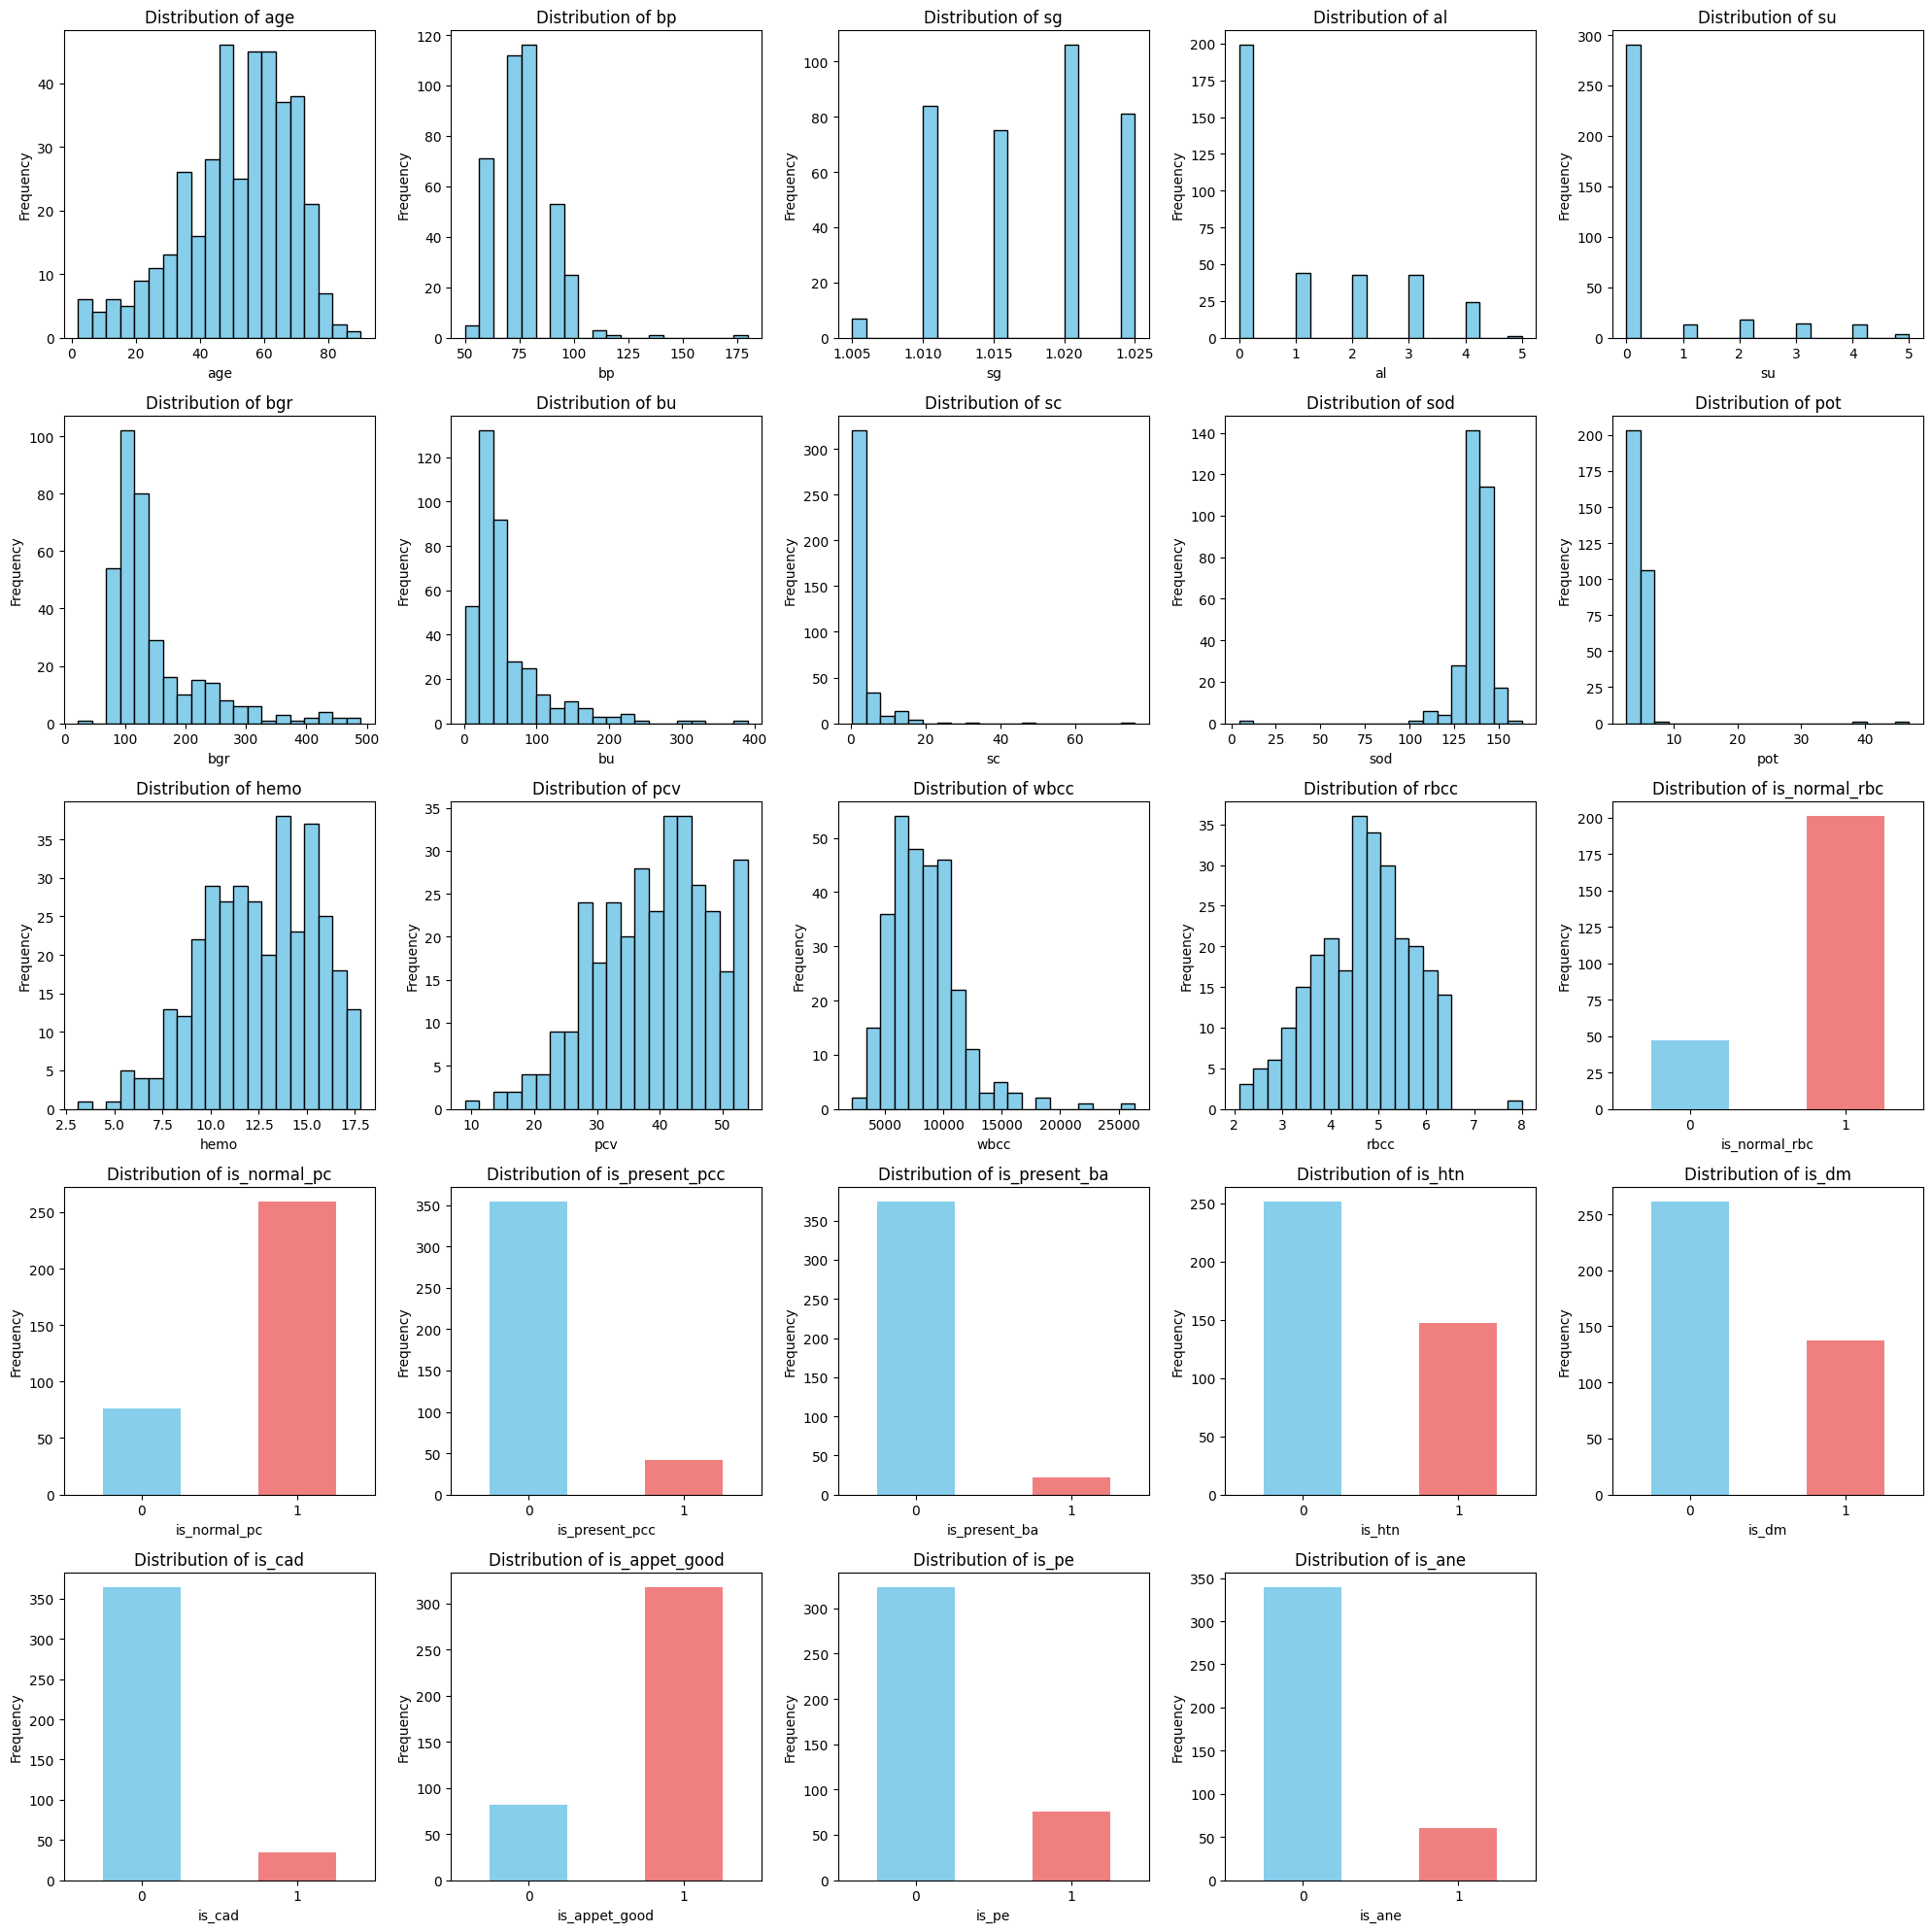

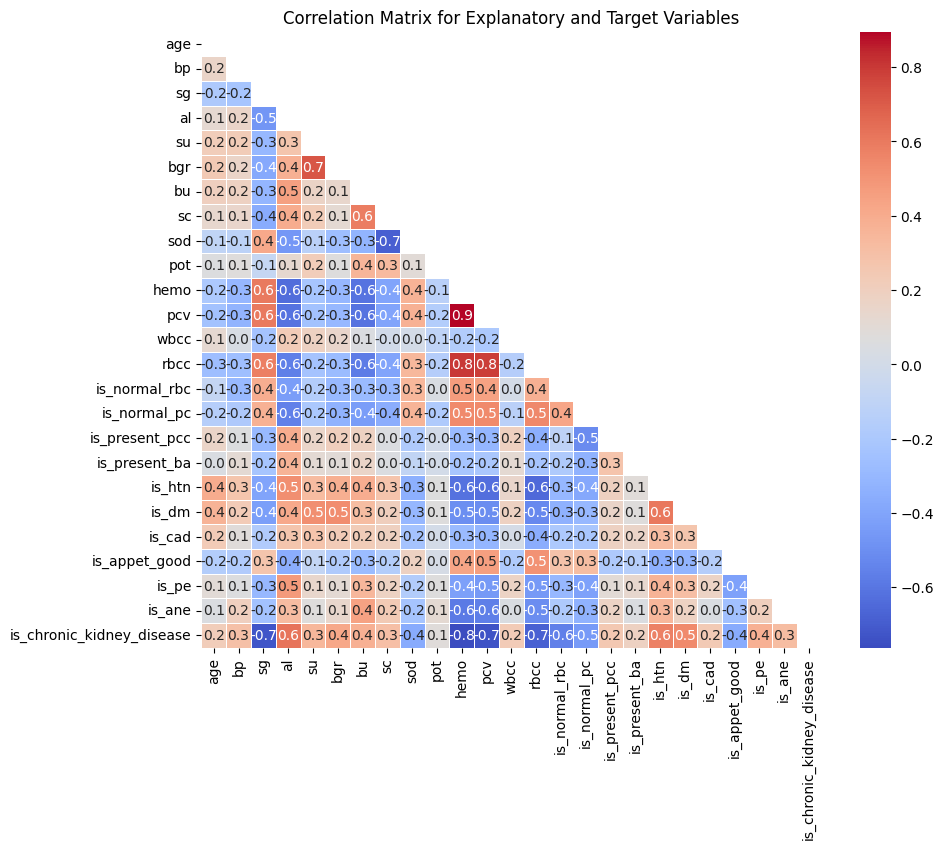

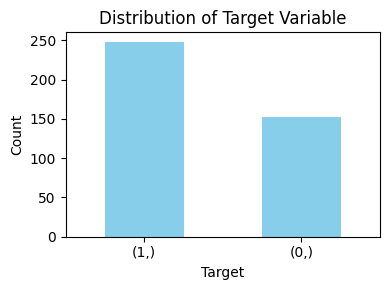

In [48]:
# Plot the distribution of each explanatory variable (X)
plot_variable_distribution(chronic_kidney_disease_X)

# Plot the correlation matrix for explanatory variables (X) and the target variable (y)
plot_correlation_matrix(chronic_kidney_disease_X, chronic_kidney_disease_y)

# Plot the distribution of the target variable (y)
plot_target_variable_distribution(chronic_kidney_disease_y)

# Preprocess the data: mean imputation, median imputation, and dropping missing rows
chronic_kidney_disease_X_mean_imputted, chronic_kidney_disease_X_median_imputted, chronic_kidney_disease_X_missing_dropped, chronic_kidney_disease_y_missing_dropped = preprocess_data(chronic_kidney_disease_X, chronic_kidney_disease_y)


In [19]:
# 1.Age(numerical)
#   	  	age in years
#  	2.Blood Pressure(numerical)
# 	       	bp in mm/Hg
#  	3.Specific Gravity(nominal)
# 	  	sg - (1.005,1.010,1.015,1.020,1.025)
#  	4.Albumin(nominal)
# 		al - (0,1,2,3,4,5)
#  	5.Sugar(nominal)
# 		su - (0,1,2,3,4,5)
#  	6.Red Blood Cells(nominal)
# 		rbc - (normal,abnormal)
#  	7.Pus Cell (nominal)
# 		pc - (normal,abnormal)
#  	8.Pus Cell clumps(nominal)
# 		pcc - (present,notpresent)
#  	9.Bacteria(nominal)
# 		ba  - (present,notpresent)
#  	10.Blood Glucose Random(numerical)		
# 		bgr in mgs/dl
#  	11.Blood Urea(numerical)	
# 		bu in mgs/dl
#  	12.Serum Creatinine(numerical)	
# 		sc in mgs/dl
#  	13.Sodium(numerical)
# 		sod in mEq/L
#  	14.Potassium(numerical)	
# 		pot in mEq/L
#  	15.Hemoglobin(numerical)
# 		hemo in gms
#  	16.Packed  Cell Volume(numerical)
#  	17.White Blood Cell Count(numerical)
# 		wc in cells/cumm
#  	18.Red Blood Cell Count(numerical)	
# 		rc in millions/cmm
#  	19.Hypertension(nominal)	
# 		htn - (yes,no)
#  	20.Diabetes Mellitus(nominal)	
# 		dm - (yes,no)
#  	21.Coronary Artery Disease(nominal)
# 		cad - (yes,no)
#  	22.Appetite(nominal)	
# 		appet - (good,poor)
#  	23.Pedal Edema(nominal)
# 		pe - (yes,no)	
#  	24.Anemia(nominal)
# 		ane - (yes,no)
#  	25.Class (nominal)		
# 		class - (ckd,notckd)

### 3.4. Breast Cancer Dataset

In [20]:
breast_cancer_X.describe().T

,count,mean,std,min,25%,50%,75%,max
radius1,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
texture1,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
perimeter1,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
area1,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
smoothness1,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
compactness1,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
concavity1,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
concave_points1,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
symmetry1,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
fractal_dimension1,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


In [24]:
breast_cancer_X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   radius1             569 non-null    float64
 1   texture1            569 non-null    float64
 2   perimeter1          569 non-null    float64
 3   area1               569 non-null    float64
 4   smoothness1         569 non-null    float64
 5   compactness1        569 non-null    float64
 6   concavity1          569 non-null    float64
 7   concave_points1     569 non-null    float64
 8   symmetry1           569 non-null    float64
 9   fractal_dimension1  569 non-null    float64
 10  radius2             569 non-null    float64
 11  texture2            569 non-null    float64
 12  perimeter2          569 non-null    float64
 13  area2               569 non-null    float64
 14  smoothness2         569 non-null    float64
 15  compactness2        569 non-null    float64
 16  concavit

In [27]:
# No missing rows in dataset
breast_cancer_X.isna().any().any()

False

In [51]:
###################################################
##### Apply binary mapping to target variable #####
###################################################

# Diagnosis = B: 357, M: 212
breast_cancer_y['is_malignant'] = pd.to_numeric(breast_cancer_y['Diagnosis'].map({'M': 1, 'B': 0}))
# Drop the original 'Diagnosis' column
breast_cancer_y.drop(columns=['Diagnosis'], inplace=True)

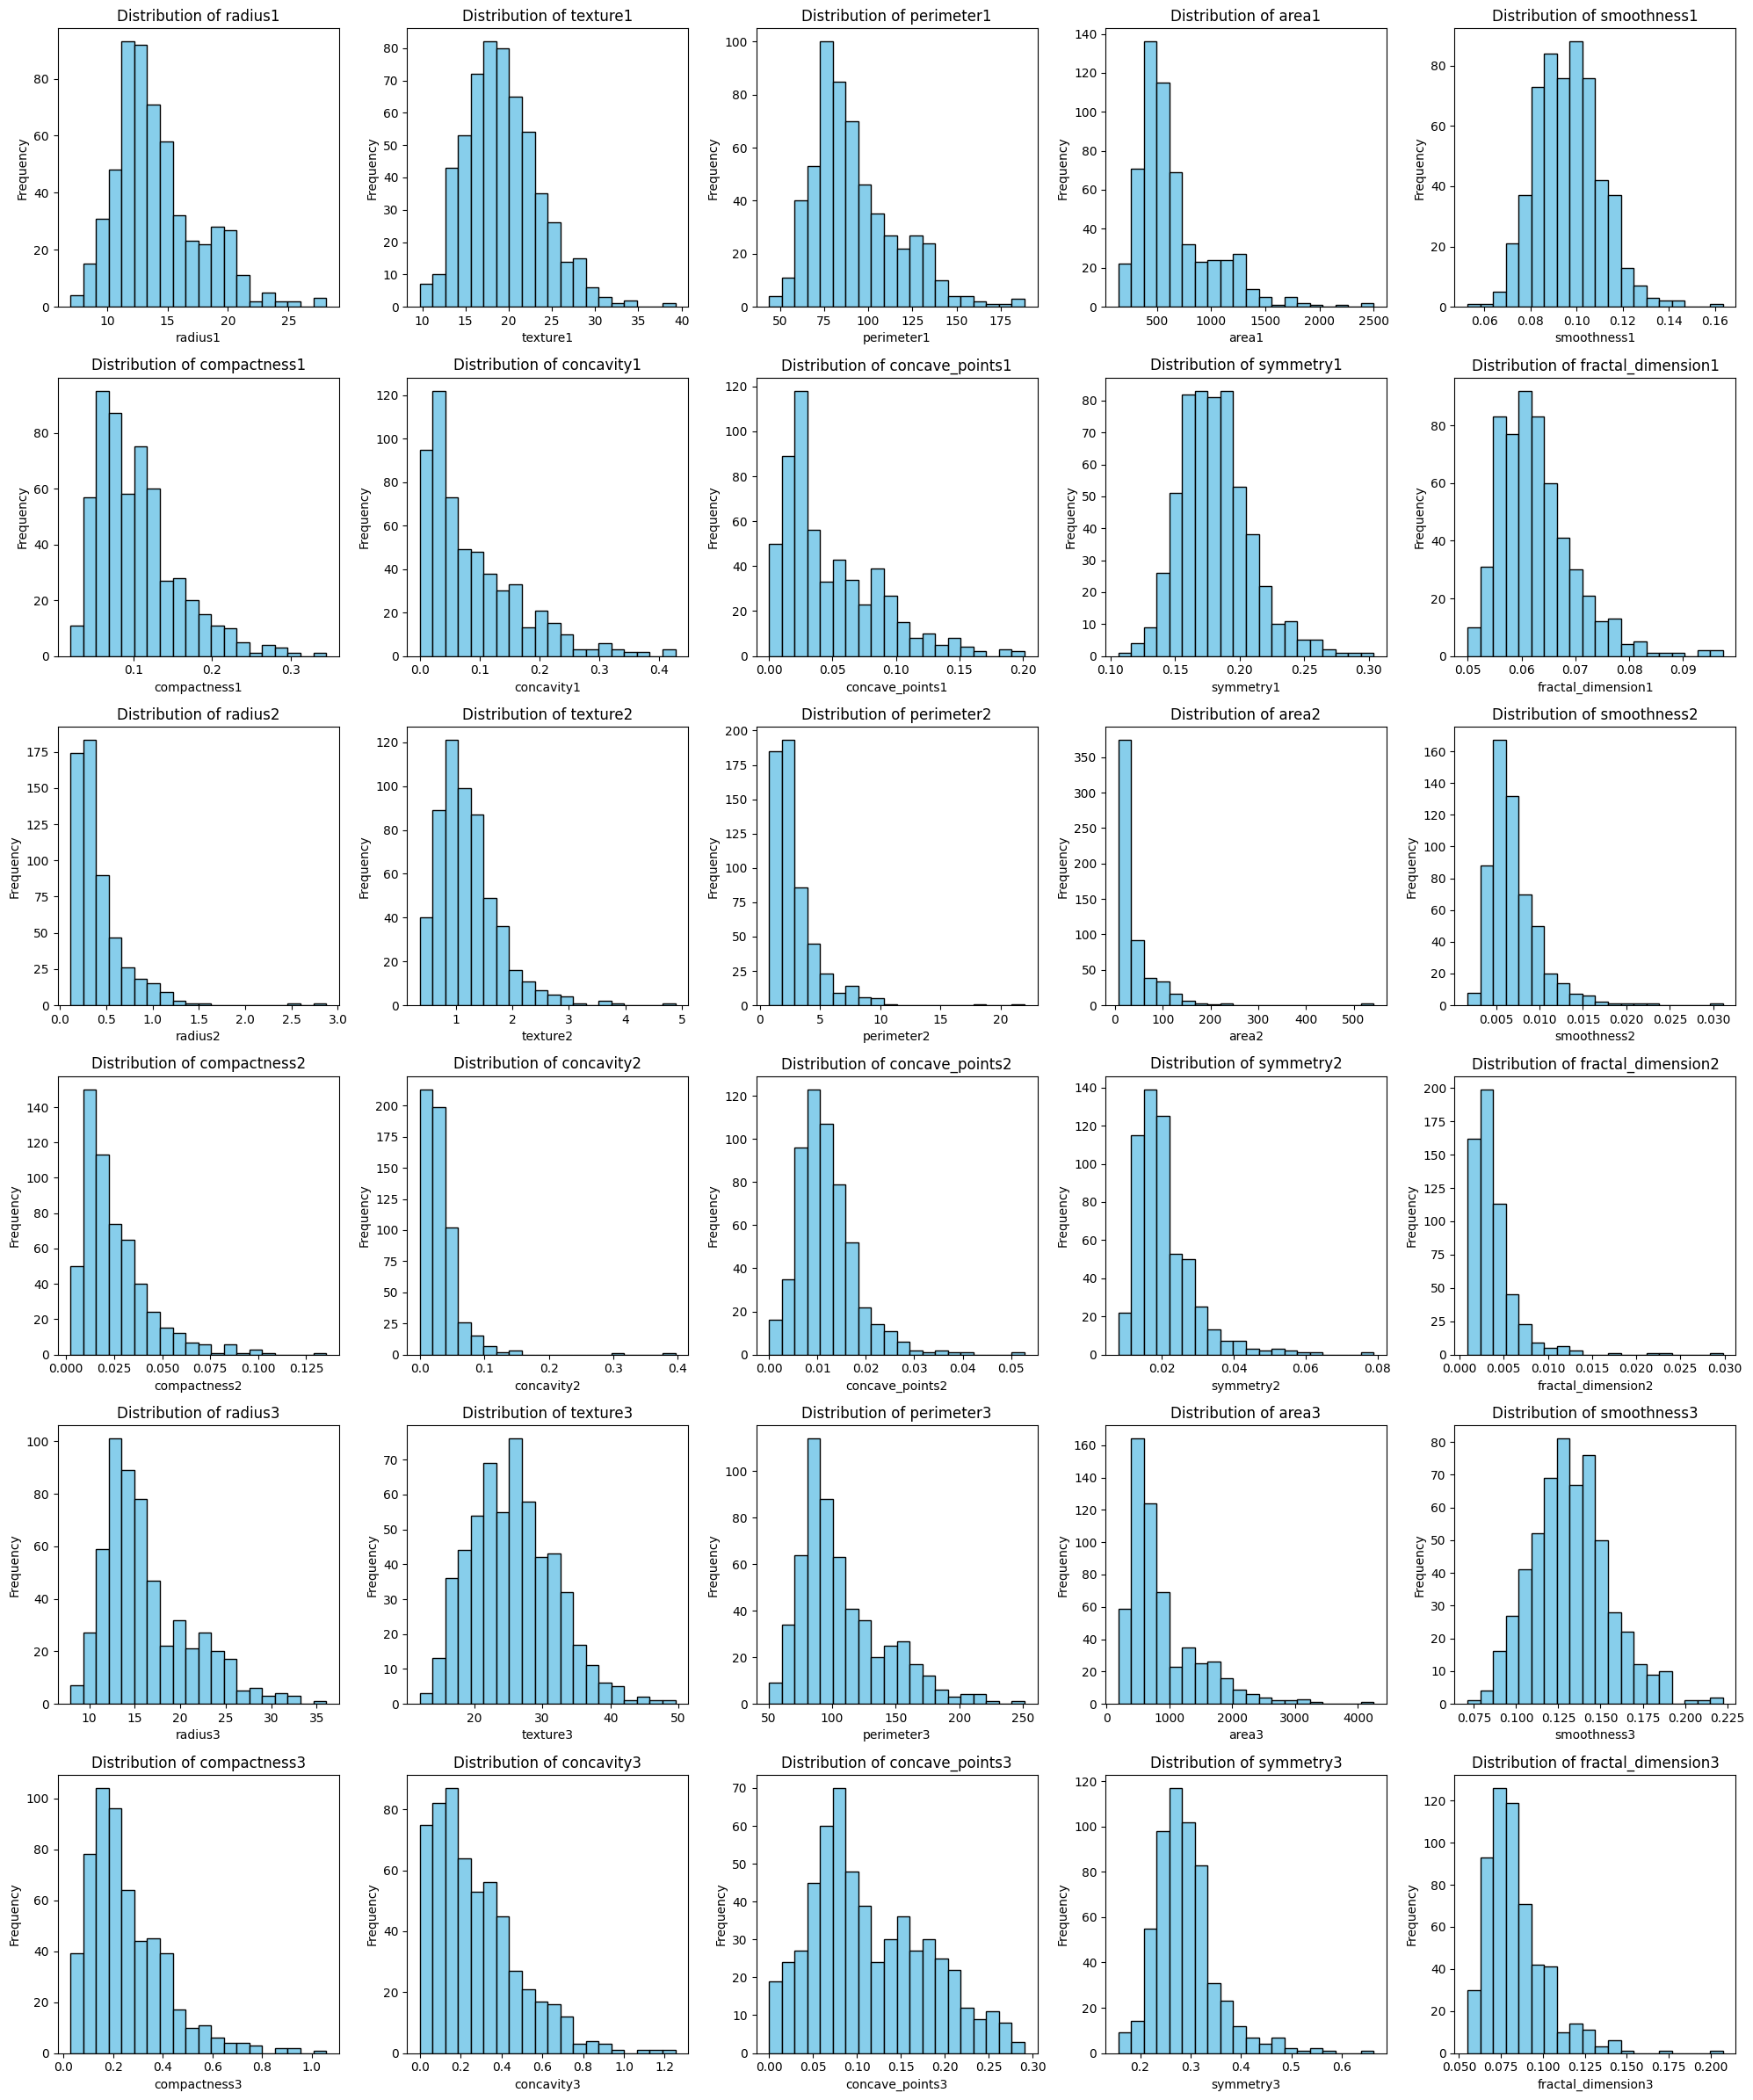

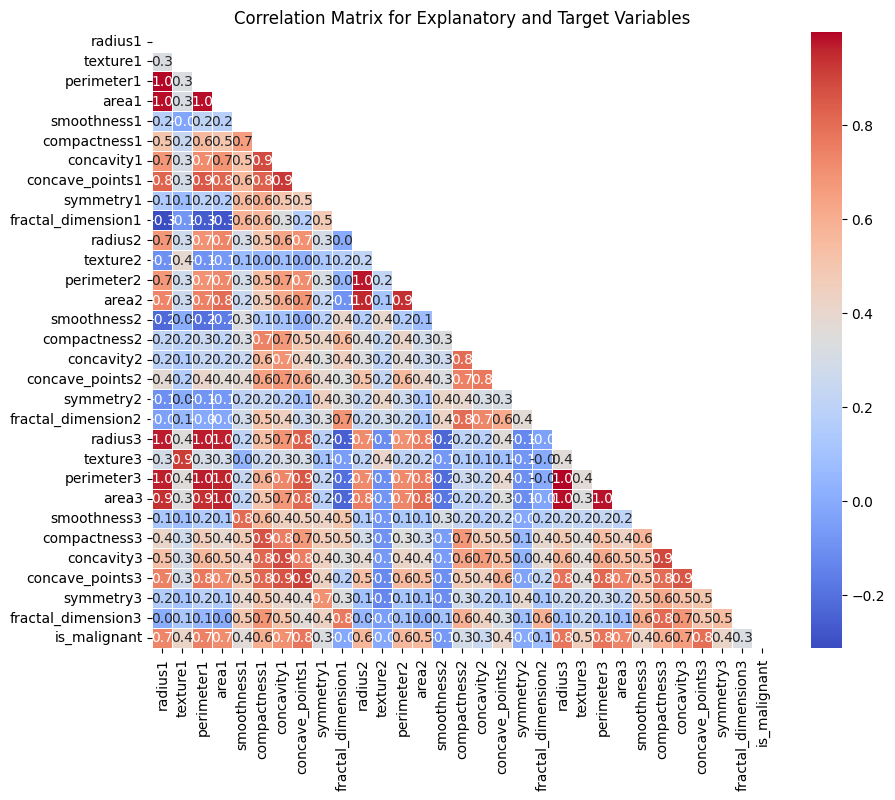

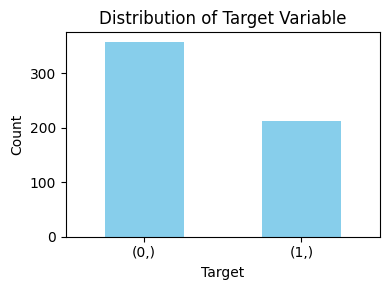

In [53]:
# Plot the distribution of each explanatory variable (X)
plot_variable_distribution(breast_cancer_X)

# Plot the correlation matrix for explanatory variables (X) and the target variable (y)
plot_correlation_matrix(breast_cancer_X, breast_cancer_y)

# Plot the distribution of the target variable (y)
plot_target_variable_distribution(breast_cancer_y)

### 3.5. Immunotherapy Dataset

In [54]:
immunotherapy_X.describe().T

,count,mean,std,min,25%,50%,75%,max
sex,90.0,1.544444,0.500811,1.0,1.00,2.00,2.0000,2.0
age,90.0,31.044444,12.235435,15.0,20.25,28.50,41.7500,56.0
Time,90.0,7.230556,3.098166,1.0,5.00,7.75,9.9375,12.0
Number_of_Warts,90.0,6.144444,4.212238,1.0,2.00,6.00,8.7500,19.0
Type,90.0,1.711111,0.824409,1.0,1.00,1.00,2.0000,3.0
Area,90.0,95.700000,136.614643,6.0,35.50,53.00,80.7500,900.0
induration_diameter,90.0,14.333333,17.217707,2.0,5.00,7.00,9.0000,70.0


In [55]:
immunotherapy_X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   sex                  90 non-null     int64  
 1   age                  90 non-null     int64  
 2   Time                 90 non-null     float64
 3   Number_of_Warts      90 non-null     int64  
 4   Type                 90 non-null     int64  
 5   Area                 90 non-null     int64  
 6   induration_diameter  90 non-null     int64  
dtypes: float64(1), int64(6)
memory usage: 5.1 KB


In [61]:
# No missing rows in dataset
immunotherapy_X.isna().any().any()

False

In [59]:
# Apply binary mapping to 'sex' column
immunotherapy_X['is_female'] = immunotherapy_X['sex'] - 1
# Drop the original column
immunotherapy_X.drop(columns=['sex'], inplace=True)

# Create one-hot encoding for the nominal 'Type' column
one_hot_encoded_immunotherapy_Type = pd.get_dummies(immunotherapy_X['Type'], prefix='is_type_')

# Concatenate the one-hot encoded DataFrame with the original DataFrame
immunotherapy_X = pd.concat([immunotherapy_X, one_hot_encoded_immunotherapy_Type], axis=1)

# Drop the original nominal 'Type' column
immunotherapy_X.drop(columns=['Type'], inplace=True)


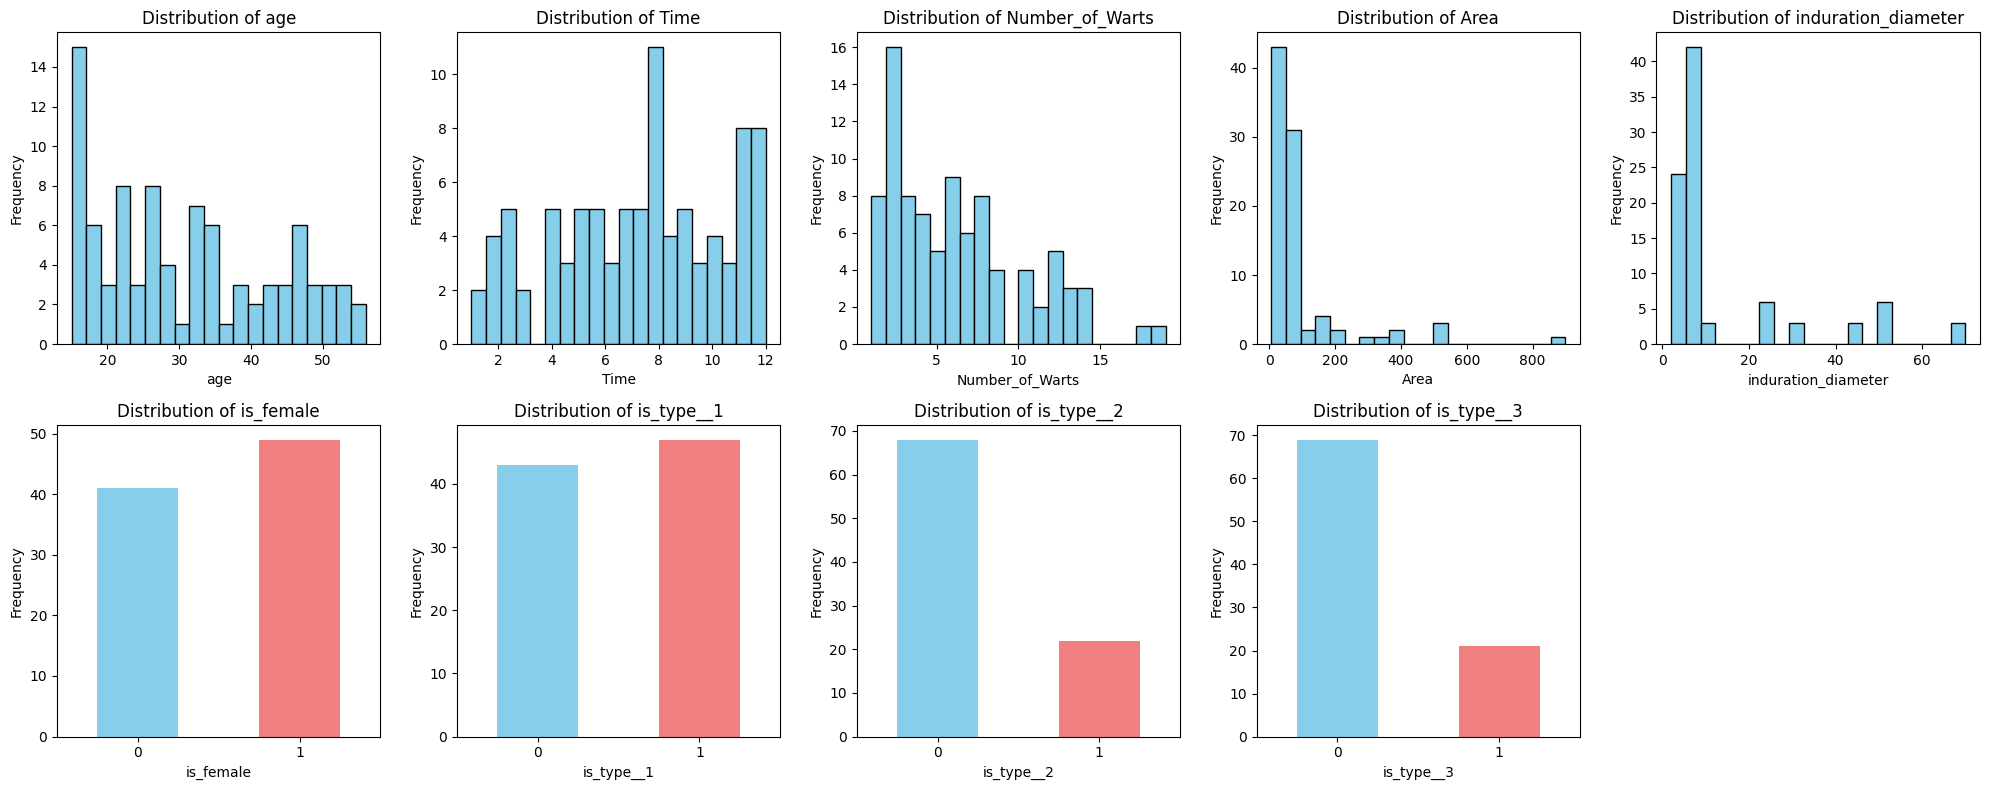

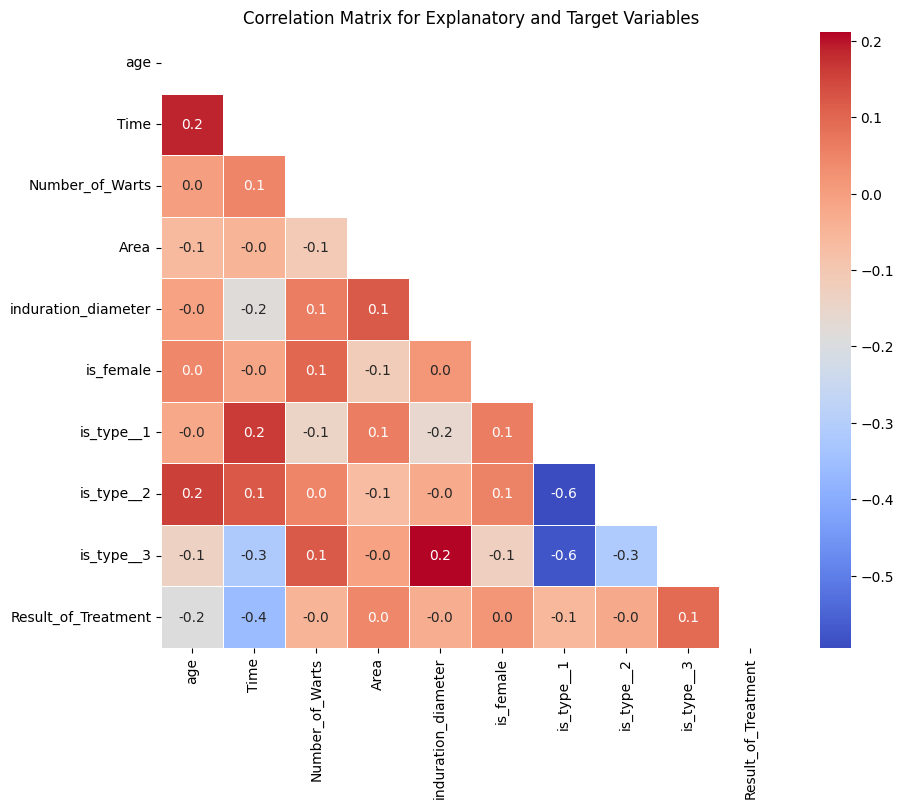

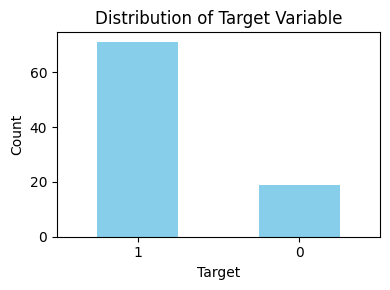

In [62]:
# Plot the distribution of each explanatory variable (X)
plot_variable_distribution(immunotherapy_X)

# Plot the correlation matrix for explanatory variables (X) and the target variable (y)
plot_correlation_matrix(immunotherapy_X, immunotherapy_y)

# Plot the distribution of the target variable (y)
plot_target_variable_distribution(immunotherapy_y)

### 3.6. Cryotherapy Dataset

In [63]:
cryotherapy_X.describe().T

,count,mean,std,min,25%,50%,75%,max
sex,90.0,1.477778,0.502304,1.00,1.0000,1.0,2.0000,2.0
age,90.0,28.600000,13.360852,15.00,18.0000,25.5,35.0000,67.0
Time,90.0,7.666667,3.406661,0.25,4.5625,8.5,10.6875,12.0
Number_of_Warts,90.0,5.511111,3.567155,1.00,2.0000,5.0,8.0000,12.0
Type,90.0,1.700000,0.905042,1.00,1.0000,1.0,3.0000,3.0
Area,90.0,85.833333,131.733153,4.00,20.0000,70.0,100.0000,750.0


In [64]:
# No missing rows in dataset
cryotherapy_X.isna().any().any()

False

In [65]:
# Apply binary mapping to 'sex' column
cryotherapy_X['is_female'] = cryotherapy_X['sex'] - 1
# Drop the original column
cryotherapy_X.drop(columns=['sex'], inplace=True)

# Create one-hot encoding for the nominal 'Type' column
one_hot_encoded_cryotherapy_Type = pd.get_dummies(cryotherapy_X['Type'], prefix='is_type_')

# Concatenate the one-hot encoded DataFrame with the original DataFrame
cryotherapy_X = pd.concat([cryotherapy_X, one_hot_encoded_cryotherapy_Type], axis=1)

# Drop the original nominal 'Type' column
cryotherapy_X.drop(columns=['Type'], inplace=True)


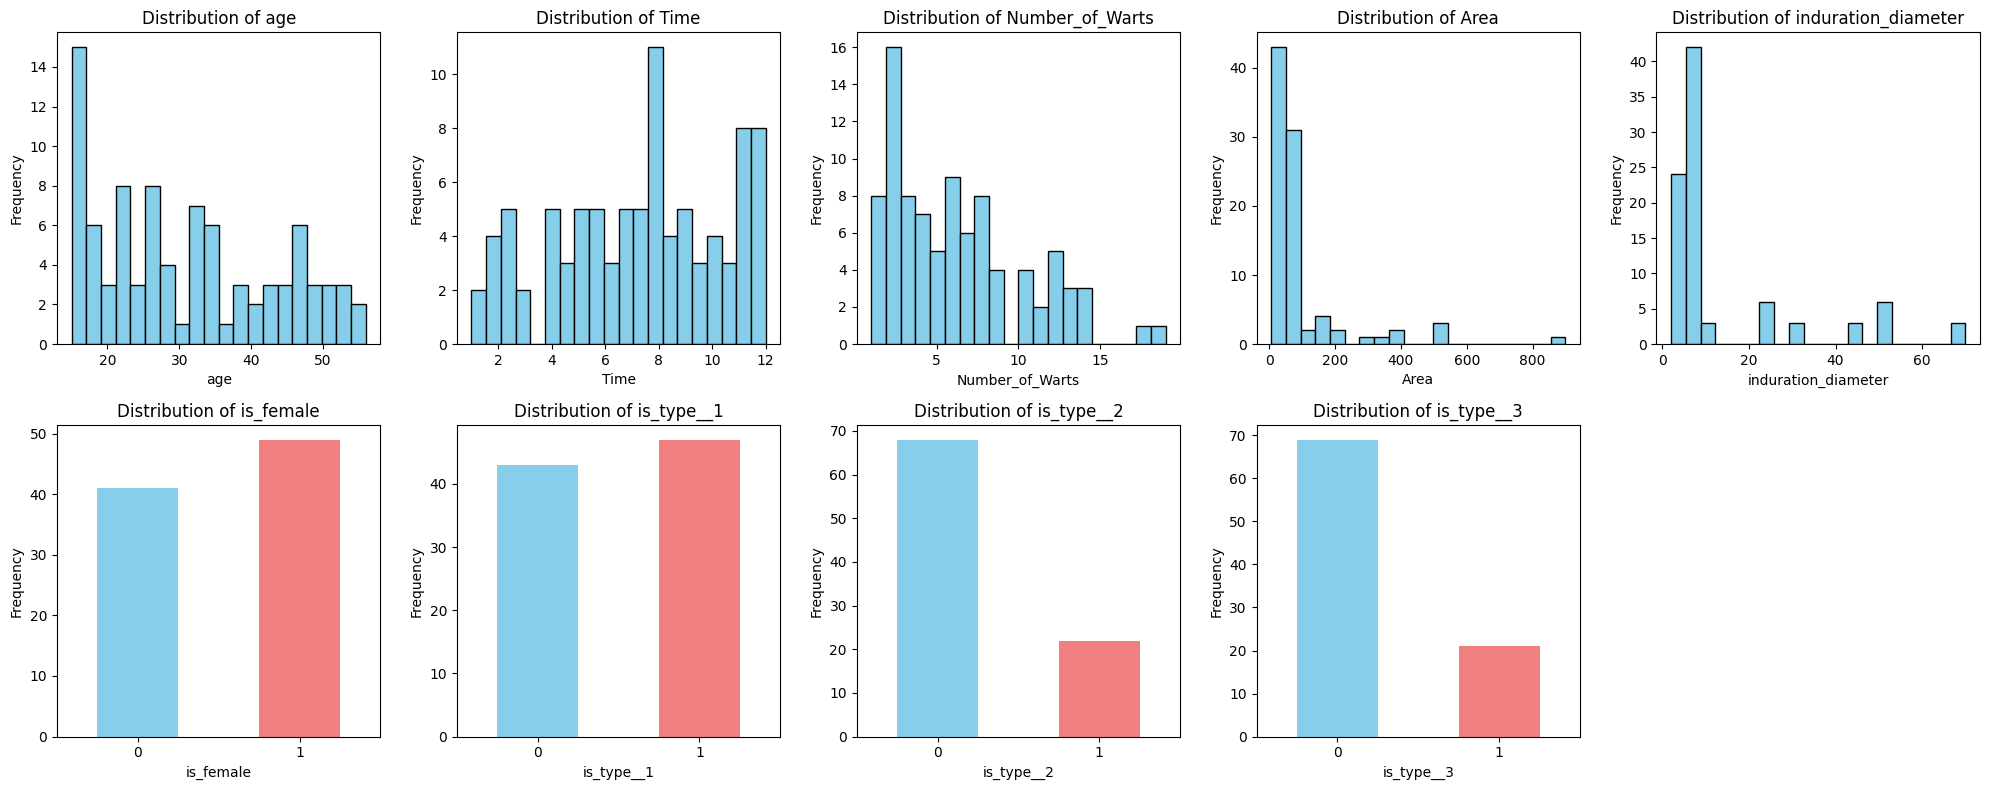

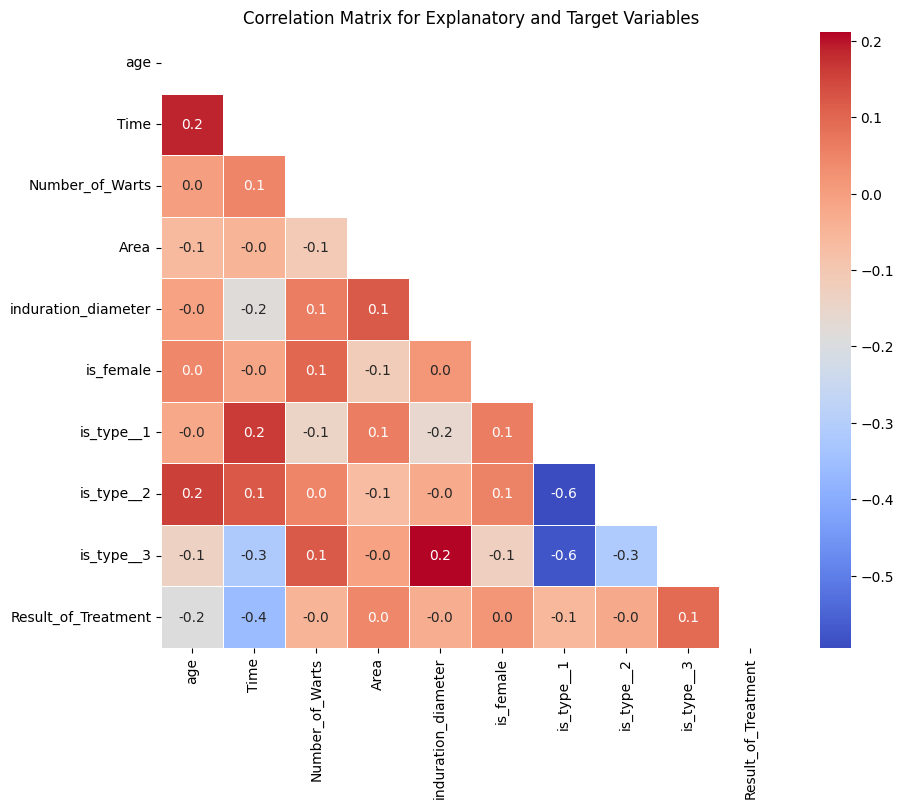

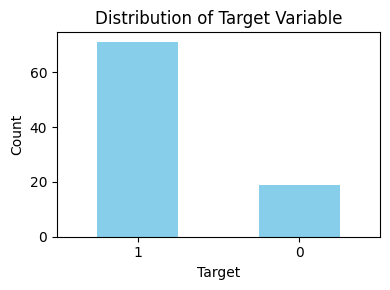

In [66]:
# Plot the distribution of each explanatory variable (X)
plot_variable_distribution(immunotherapy_X)

# Plot the correlation matrix for explanatory variables (X) and the target variable (y)
plot_correlation_matrix(immunotherapy_X, immunotherapy_y)

# Plot the distribution of the target variable (y)
plot_target_variable_distribution(immunotherapy_y)